### Загрузка необходимых библиотек

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

### определим полезные функции:

In [2]:
# ф-я принимает серию возвращает кортеж :
# [0]-25% перцентиль серии
# [1]-75% перцентиль серии
# [2]-IQR
# [3]-нижняя граница выбросов
# [4]-верхняя граница выбросов

def get_bounds(ser):
    perc25 = ser.quantile(0.25)
    perc75 = ser.quantile(0.75)
    IQR = perc75-perc25

    return (perc25, perc75, IQR, perc25-1.5*IQR, perc75+1.5*IQR)

In [3]:
# ф-я выводит 25% и 75% перцентили серии, IQR, границы выбросов, рисует гистограмму по серии, исключая выбросы

def print_hist(ser):
    bounds = get_bounds(ser)

    print(
        '25-й перцентиль: {},'.format(bounds[0]),
        '75-й перцентиль: {},'.format(bounds[1]),
        "IQR: {},".format(bounds[2]),
        "Границы выбросов: [{L},{H}].".format(L=bounds[3], H=bounds[4])
    )

    ser.loc[ser.between(bounds[3], bounds[4])].hist(
        bins=16, range=(ser.min(), ser.max()), label='IQR')

    plt.legend()

In [4]:
# ф-я возвращает серию без выбросов, для определения границ выбросов используется get_bounds()

def filter_emissions(ser):
    bounds = get_bounds(ser)
    return ser[ser.between(bounds[3], bounds[4])]

In [5]:
# ф-я строит боксплот для переданной колонки

def get_boxplot(column):
    fig,ax=plt.subplots(figsize=(14,4))
    sns.boxplot(x=column, y='score',
               data=dt.loc[dt.loc[:,column].isin(dt.loc[:,column].value_counts().index[:10])],
               ax=ax
               )
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for '+ column)
    plt.show()
    

In [74]:
# ф-я проверяет нулевую гипотезу о том, что score равен у представителей разных категорий

def get_stat_diff(column, importance):
    cols = dt.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dt.loc[dt.loc[:, column] == comb[0], 'score'],
                     dt.loc[dt.loc[:, column] == comb[1], 'score'],
                     nan_policy="omit").pvalue\
                <= importance/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

### Загрузка данных, переименование столбцов для удобства, первичный осмотр

In [7]:
data_row = pd.read_csv('stud_math.csv', na_filter=True)
dt = data_row.copy()
dt.rename(columns={
                   'studytime, granular': 'studytime_granular'
                  }, inplace = True)

In [8]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [9]:
dt.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [10]:
dt.describe()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

###  пустых значений в любом из столбцов меньше 10%, поэтому можем их оставить

### рассмотрим сначала числовые (int64/float64) столбцы:
# AGE

### проверим корректность данных:

In [12]:
dt.age.value_counts()

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

### В выборке представлены возраста от 15 до 22 лет

<AxesSubplot:>

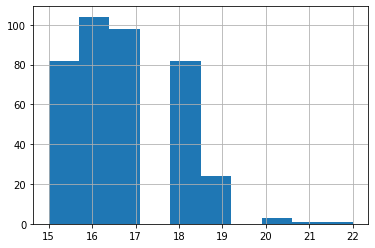

In [13]:
dt.age.hist()

### медиана 16.7,  наиболее часто в датасете фигурируют подростки 16 лет

<AxesSubplot:xlabel='age'>

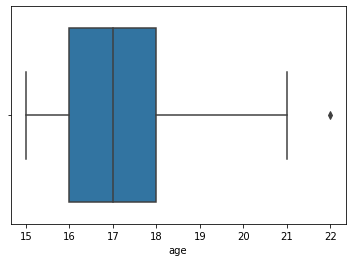

In [14]:
sns.boxplot(data=dt, x ='age')

### Есть выбросы, отфильтруем 

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0, Границы выбросов: [13.0,21.0].


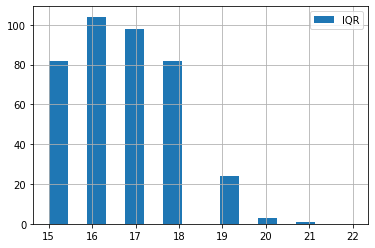

In [15]:
print_hist(dt.age)

In [16]:
dt.age = filter_emissions(dt.age)

# Medu

In [17]:
dt.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

<AxesSubplot:xlabel='Medu'>

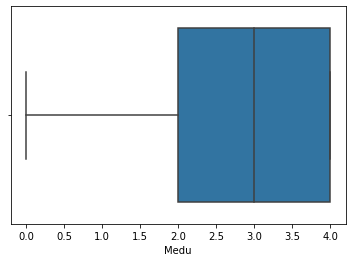

In [18]:
sns.boxplot(data = dt, x='Medu')

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0, Границы выбросов: [-1.0,7.0].


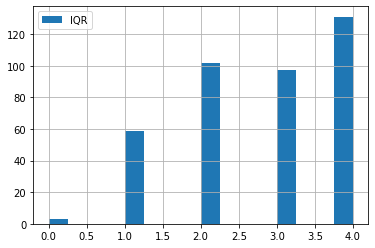

In [19]:
print_hist(dt.Medu)

### В данном случае стандартная методика определения выбросов не отбрасывает 3 случая со значением 0, на мой взгляд, модель будет работать лучше без этих значений:

In [20]:
dt = dt.loc[dt.Medu.between(1,4)]

# Fedu

In [21]:
dt.Fedu.value_counts()

2.0     103
3.0      95
4.0      88
1.0      76
0.0       2
40.0      1
Name: Fedu, dtype: int64

<AxesSubplot:xlabel='Fedu'>

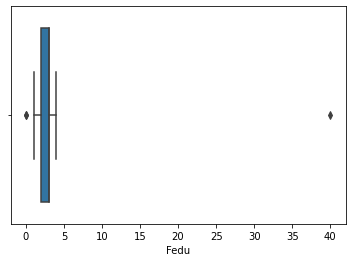

In [22]:
sns.boxplot(data = dt, x='Fedu')

### есть некорректное значение, и выброс, отфильтруем:

In [23]:
dt.Fedu = filter_emissions(dt.Fedu)

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0, Границы выбросов: [0.5,4.5].


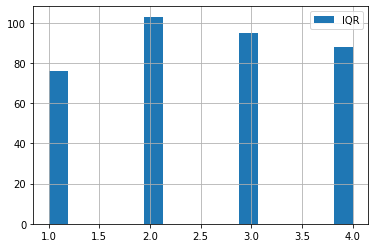

In [24]:
print_hist(dt.Fedu)

# Traveltime

In [25]:
dt.traveltime.value_counts()

1.0    237
2.0     95
3.0     22
4.0      7
Name: traveltime, dtype: int64

<AxesSubplot:xlabel='traveltime'>

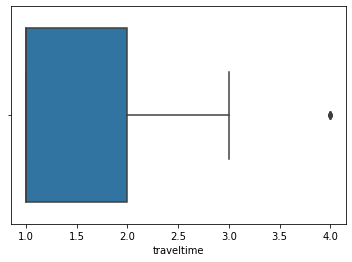

In [26]:
sns.boxplot(data = dt, x = 'traveltime')

###  Значения корректные, значение 4 можно считать выбросами, фильтруем:

In [27]:
dt.traveltime = filter_emissions(dt.traveltime)


25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0, Границы выбросов: [-0.5,3.5].


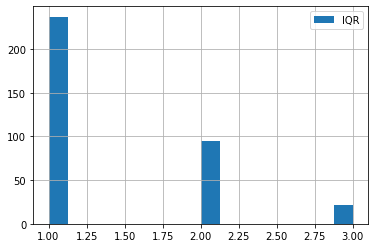

In [28]:
print_hist(dt.traveltime)

# Studytime

In [29]:
dt.studytime.value_counts()

2.0    191
1.0    101
3.0     63
4.0     27
Name: studytime, dtype: int64

<AxesSubplot:xlabel='studytime'>

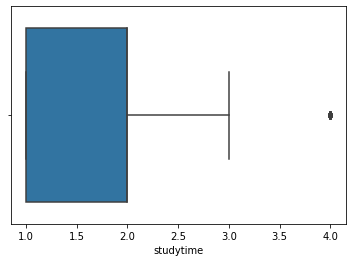

In [30]:
sns.boxplot(data = dt, x = 'studytime')

### Значения корректные, значение 4 попадает под выброс, но на мой взгляд, его на данном этапе анализа необходимо оставить, т.к. таких случаев существенное кол-во - 27. При необходимости эти значения необходимо отфильтровать позднее

<AxesSubplot:>

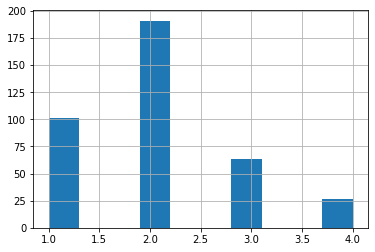

In [31]:
dt.studytime.hist()

# Failures

In [32]:
dt.failures.value_counts()

0.0    289
1.0     48
2.0     16
3.0     14
Name: failures, dtype: int64

<AxesSubplot:>

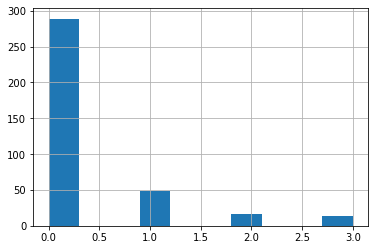

In [33]:
dt.failures.hist()

<AxesSubplot:xlabel='failures'>

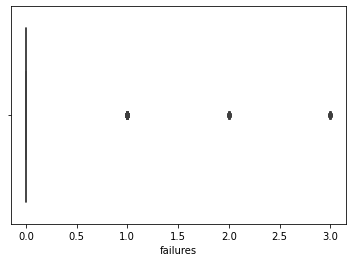

In [34]:
sns.boxplot(data= dt, x = 'failures')

### фильтровать выбросы не имеет смысла, т.к. это равносильно исключению из рассмотрения всего столбца, на мой взгляд, на данном этапе анализа необходимо оставить все значения

# studytime_granular

In [35]:
dt.studytime_granular.value_counts()

-6.0     191
-3.0     101
-9.0      63
-12.0     27
Name: studytime_granular, dtype: int64

<AxesSubplot:>

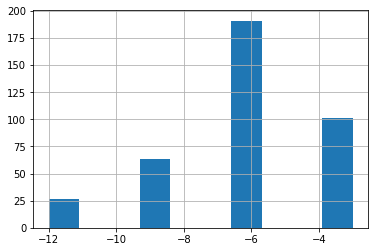

In [36]:
dt.studytime_granular.hist()

<AxesSubplot:xlabel='studytime_granular'>

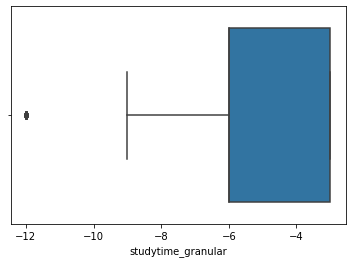

In [37]:
sns.boxplot(data=dt, x='studytime_granular')

### пока нет информации что за поле, ошибочных значений нет, выброс не фильтруем, т.к. кол-во  (27) существенное

# famrel

In [38]:
dt.famrel.value_counts()

 4.0    180
 5.0     98
 3.0     59
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

### сразу фильтруем некорректное значение

In [39]:
dt = dt[dt.famrel > 0]

<AxesSubplot:xlabel='famrel'>

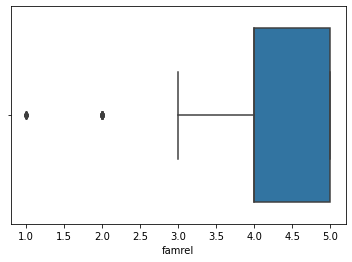

In [40]:
sns.boxplot(data=dt, x='famrel')

### Фильтруем выбросы

In [41]:
dt.famrel = filter_emissions(dt.famrel)

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0, Границы выбросов: [2.5,6.5].


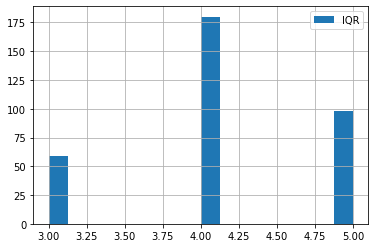

In [42]:
print_hist(dt.famrel)

# Freetime

In [43]:
dt.freetime.value_counts()

3.0    137
4.0    104
2.0     58
5.0     35
1.0     17
Name: freetime, dtype: int64

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0, Границы выбросов: [1.5,5.5].


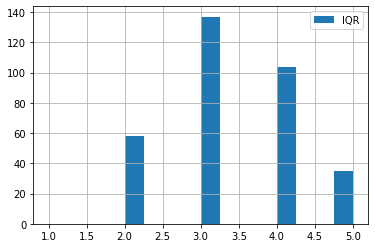

In [44]:
print_hist(dt.freetime)

### Значения корректные, фильтруем выбросы

In [45]:
dt.freetime = filter_emissions(dt.freetime)

# goout

In [46]:
dt.goout.value_counts()

3.0    119
2.0     91
4.0     76
5.0     48
1.0     20
Name: goout, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0, Границы выбросов: [-1.0,7.0].


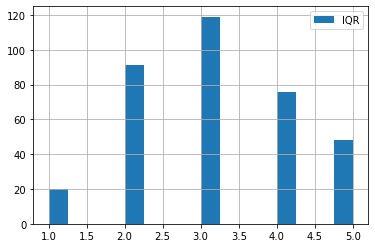

In [47]:
print_hist(dt.goout)

### значения корректные, выбросов нет

# Health

In [48]:
dt.health.value_counts()

5.0    117
3.0     87
4.0     60
1.0     43
2.0     39
Name: health, dtype: int64

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0, Границы выбросов: [0.0,8.0].


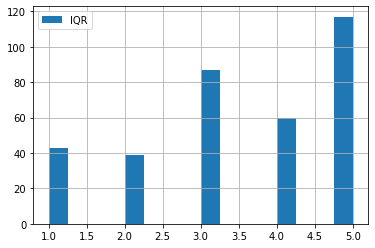

In [49]:
print_hist(dt.health)

### ошибочных значений нет, выбросов нет

# absences

In [50]:
dt.absences.value_counts()

0.0      97
2.0      56
4.0      51
6.0      29
8.0      20
10.0     15
12.0     12
14.0     10
3.0       8
16.0      7
7.0       6
5.0       5
18.0      4
22.0      3
20.0      3
9.0       2
1.0       2
15.0      2
24.0      1
25.0      1
23.0      1
56.0      1
13.0      1
19.0      1
17.0      1
21.0      1
212.0     1
26.0      1
30.0      1
40.0      1
28.0      1
11.0      1
385.0     1
38.0      1
54.0      1
Name: absences, dtype: int64

<AxesSubplot:xlabel='absences'>

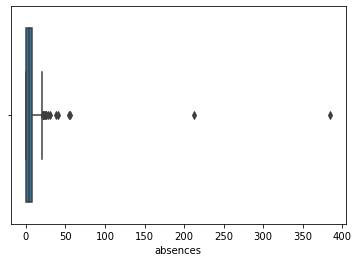

In [51]:
sns.boxplot(data=dt, x='absences')

### фильтруем выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 7.0, IQR: 7.0, Границы выбросов: [-10.5,17.5].


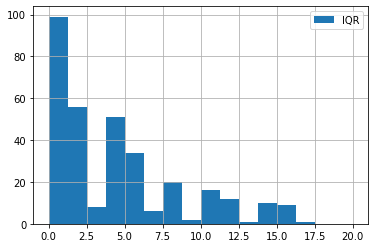

In [52]:
dt.absences = filter_emissions(dt.absences)
print_hist(dt.absences)

# Рассмотрим текстовые столбцы (object)

# School

In [53]:
dt.school.value_counts()

GP    319
MS     42
Name: school, dtype: int64

### Значения корректные, в выборке всего 2 школы

# Sex

In [54]:
dt.sex.value_counts()

F    192
M    169
Name: sex, dtype: int64

### Значения корректные, женский пол преобладает

# Address (U - городской, R - за городом)

In [55]:
dt.address.value_counts()

U    273
R     74
Name: address, dtype: int64

### Значения корректные, большинство живет в городе

# Famsize (LE3' <= 3, 'GT3' >3)

In [56]:
dt.famsize.value_counts()

GT3    237
LE3     99
Name: famsize, dtype: int64

### Значения корректные, в большинство семей состоит из более чем 3 человек

# Pstaus (статус родителей, T - вместе, A - раздельно)

In [57]:
dt.Pstatus.value_counts()

T    287
A     32
Name: Pstatus, dtype: int64

### Значения корректные, в большинстве случае родители опрошенных живут совместно

# Mjob (работа матери)

In [58]:
dt.Mjob.value_counts()

other       122
services     88
at_home      52
teacher      51
health       30
Name: Mjob, dtype: int64

### Значения корректные

# Fjob (работа отца)

In [59]:
dt.Fjob.value_counts()

other       180
services     93
teacher      29
at_home      15
health       13
Name: Fjob, dtype: int64

### Значения корректные

# Reason (причина выбора школы)

In [60]:
dt.reason.value_counts()

course        122
reputation     96
home           95
other          33
Name: reason, dtype: int64

### Значения корректные, в большинстве случаев школу выбирают по образовательной программе

# Guardian (опекун)

In [61]:
dt.guardian.value_counts()

mother    230
father     76
other      26
Name: guardian, dtype: int64

### Значения корректные, в основном опекун - мама

# Schoolsup (доп образовательная поддержка)

In [62]:
dt.schoolsup.value_counts()

no     305
yes     47
Name: schoolsup, dtype: int64

### Значения корректные, большинство не пользуются доп поддержкой

# Famsup (семейная образовательная поддержка)

In [63]:
dt.famsup.value_counts()

yes    198
no     127
Name: famsup, dtype: int64

### Значения корректные, в большинстве случаев семья оказывает поддержку

# Paid (доп платные занятия по математике)

In [64]:
dt.paid.value_counts()

no     179
yes    144
Name: paid, dtype: int64

### Значения корректные, большинство не посещают доп занятия по математике

# Activities (доп внеучебные занятия)

In [65]:
dt.activities.value_counts()

yes    181
no     168
Name: activities, dtype: int64

### Значения корректные, большинство имеют доп занятия

# Nursery (посещал ли дет сад)

In [66]:
dt.nursery.value_counts()

yes    275
no      71
Name: nursery, dtype: int64

### Значения корректные, большинство дет сад посещали

# Higher (планирует высш образование)

In [67]:
dt.higher.value_counts()

yes    327
no      15
Name: higher, dtype: int64

### Значения корректные, подавляющее большинство планируют ВО

# Internet (Наличие интернета дома)

In [68]:
dt.internet.value_counts()

yes    280
no      50
Name: internet, dtype: int64

### Значения корректные, большинство имеют доступ к интернету

# Romantic (в отношениях)

In [69]:
dt.romantic.value_counts()

no     221
yes    113
Name: romantic, dtype: int64

### Значения корректные, большинство не состоит в отношениях

# Корреляционный анализ количественных переменных

In [70]:
dt.corr() 


,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.166122,-0.168468,0.101697,-0.019243,0.189162,0.019243,0.045695,0.006342,0.104236,-0.076472,0.115618,-0.139421
Medu,-0.166122,1.000000,0.656551,-0.125238,0.076862,-0.221293,-0.076862,0.035897,0.006222,0.069191,-0.053456,0.093427,0.228308
Fedu,-0.168468,0.656551,1.000000,-0.139235,0.030241,-0.264047,-0.030241,-0.025819,-0.043363,0.013977,-0.007232,-0.016081,0.139483
traveltime,0.101697,-0.125238,-0.139235,1.000000,-0.140451,0.013102,0.140451,-0.045121,-0.061860,-0.074928,-0.055920,-0.089558,-0.069619
studytime,-0.019243,0.076862,0.030241,-0.140451,1.000000,-0.175120,-1.000000,0.059876,-0.100168,-0.081716,-0.079565,-0.077488,0.111724
failures,0.189162,-0.221293,-0.264047,0.013102,-0.175120,1.000000,0.175120,0.051854,0.118045,0.135784,0.062123,0.063544,-0.339818
studytime_granular,0.019243,-0.076862,-0.030241,0.140451,-1.000000,0.175120,1.000000,-0.059876,0.100168,0.081716,0.079565,0.077488,-0.111724
famrel,0.045695,0.035897,-0.025819,-0.045121,0.059876,0.051854,-0.059876,1.000000,0.101102,0.088197,0.028572,-0.025090,0.067387
freetime,0.006342,0.006222,-0.043363,-0.061860,-0.100168,0.118045,0.100168,0.101102,1.000000,0.257385,0.085869,0.125590,0.018981
goout,0.104236,0.069191,0.013977,-0.074928,-0.081716,0.135784,0.081716,0.088197,0.257385,1.000000,-0.033286,0.096211,-0.115458


In [71]:
(dt.corr()).score.sort_values()

failures             -0.339818
age                  -0.139421
goout                -0.115458
studytime_granular   -0.111724
health               -0.077837
traveltime           -0.069619
freetime              0.018981
famrel                0.067387
absences              0.103698
studytime             0.111724
Fedu                  0.139483
Medu                  0.228308
score                 1.000000
Name: score, dtype: float64

##### все поля очень слабо скоррелированы с score, но некоторые выводы сделать можно
##### наибольшая корреляция c score есть у:
* ##### failures
* ##### age
* ##### goout
* ##### studytime_granular
* ##### abscences
* ##### studytime
* ##### Medu
* ##### Fedu
##### наименьшая корреляция c score у:
* ##### health
* ##### trveltime
* ##### freetime
* ##### famrel

##### Интересно что
- ##### Образование матери оказывает большее внимание на успехи ребенка в математике, нежели образование отца
- ##### Здоровье практически не связано с успехами в математике
- ##### больше прогулов - лучше баллы по математике на экзамене (шутка, имеется ввиду слабая, но положительная корреляция этих переменных)

# анализ номинативных переменных
#### т.к. числовые поля (типа float64) имеют соответствие своего значения некой категории (например, Fedu = 3 означает среднее специальное образование отца), то их можно также анализировать и как номинативные переменные, с помощью boxplot

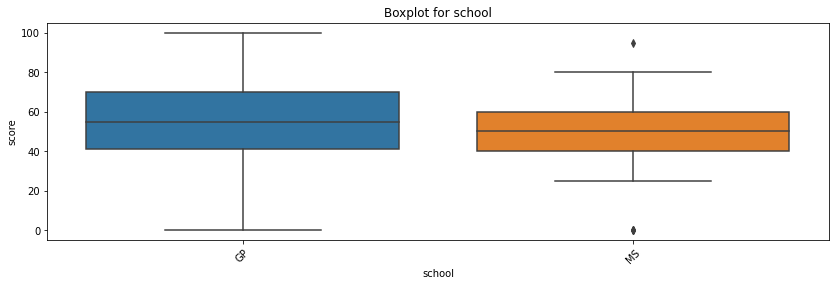

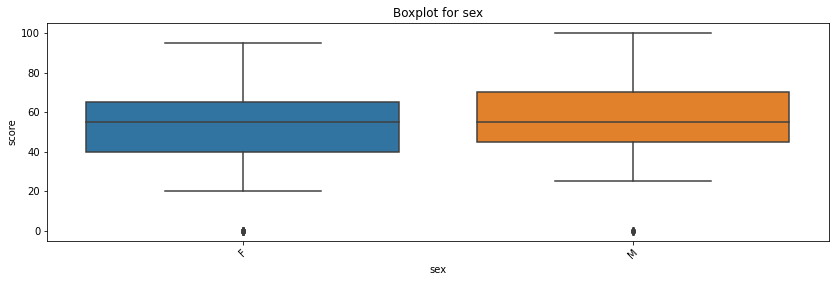

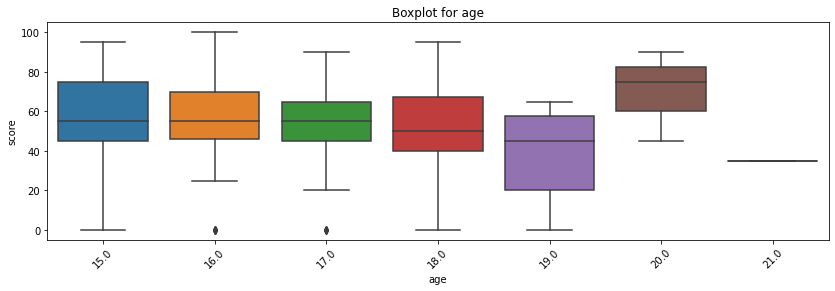

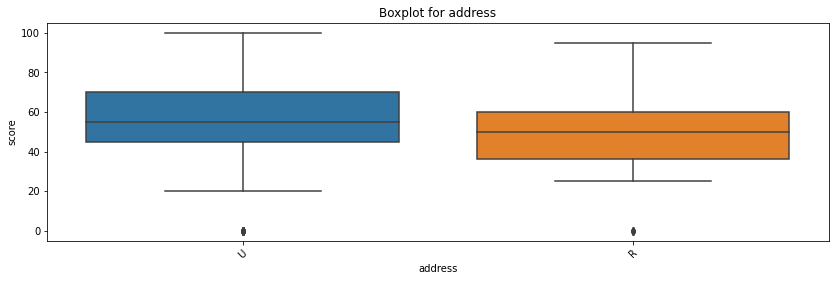

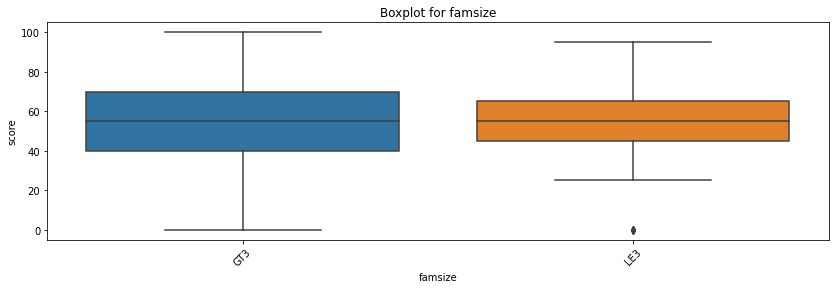

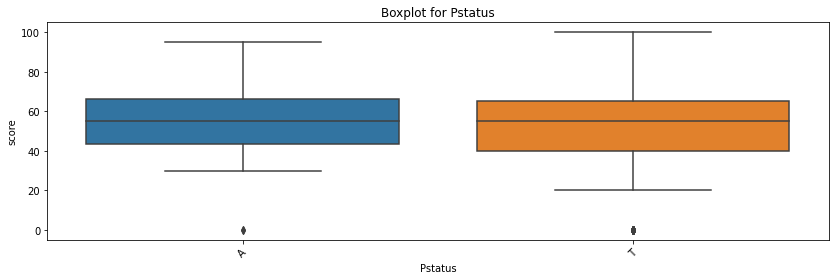

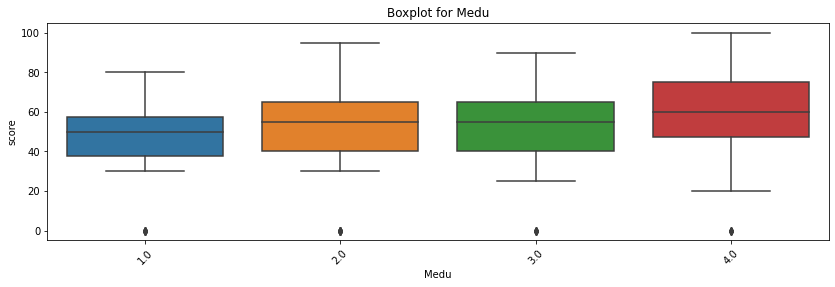

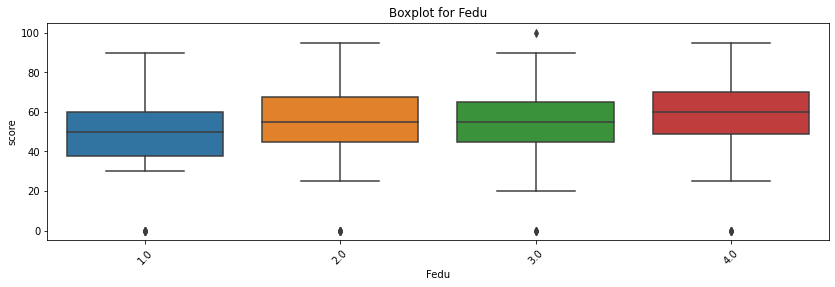

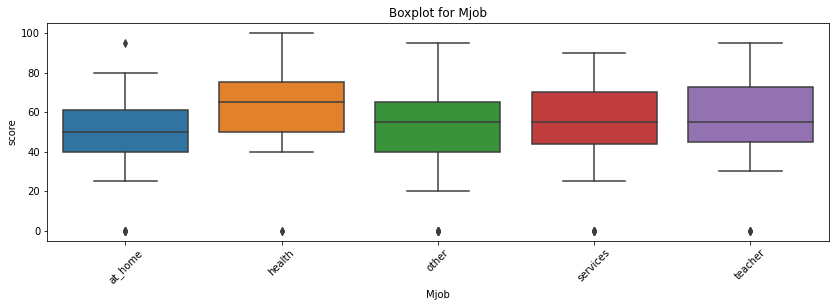

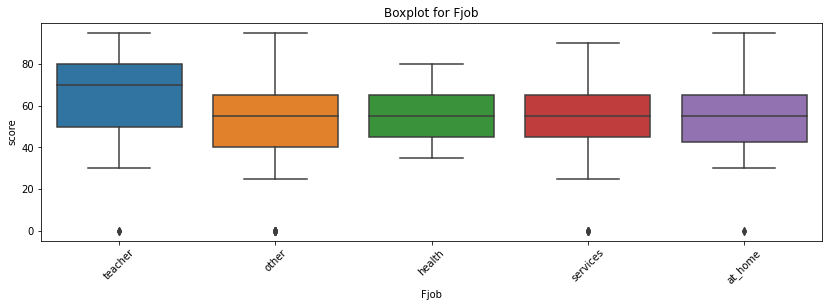

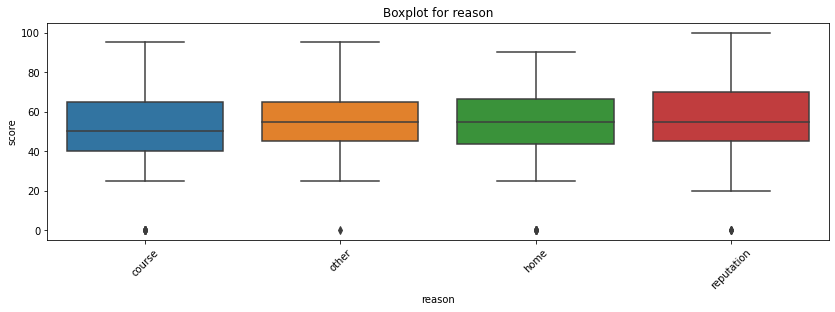

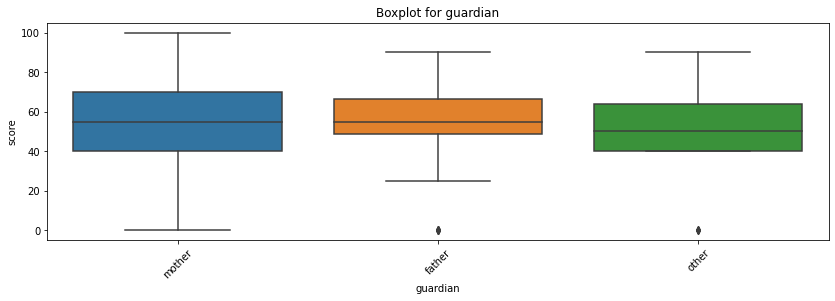

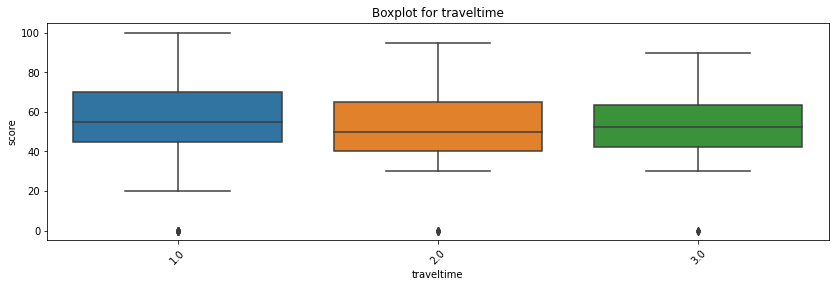

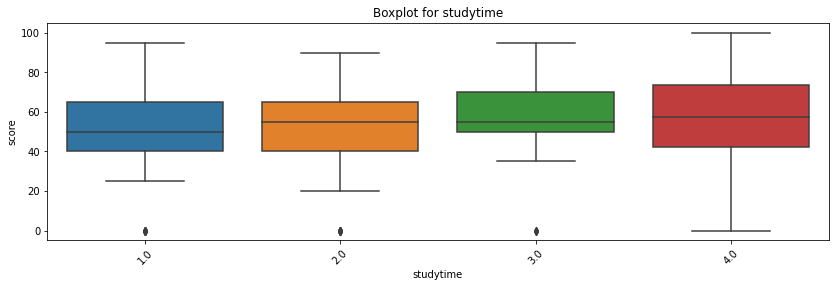

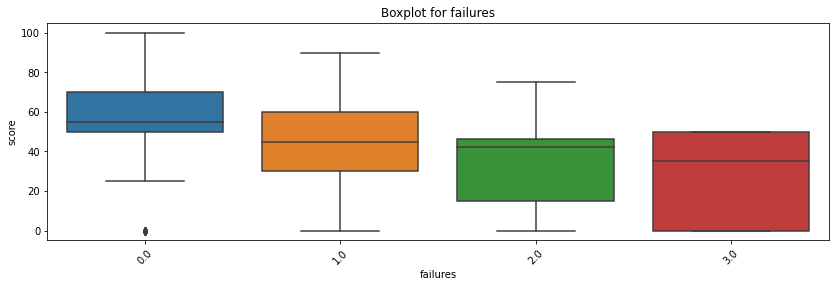

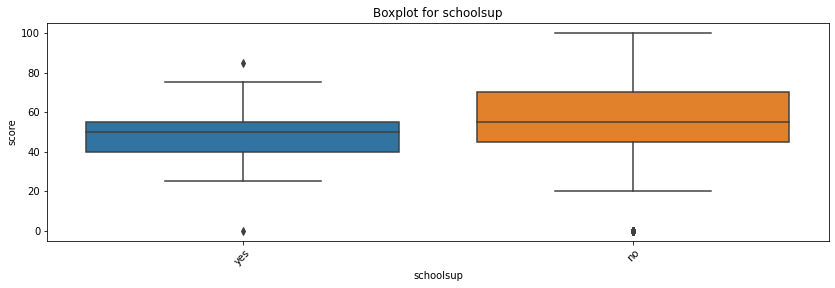

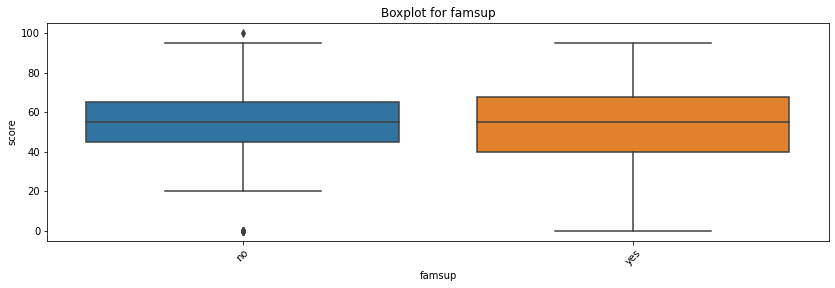

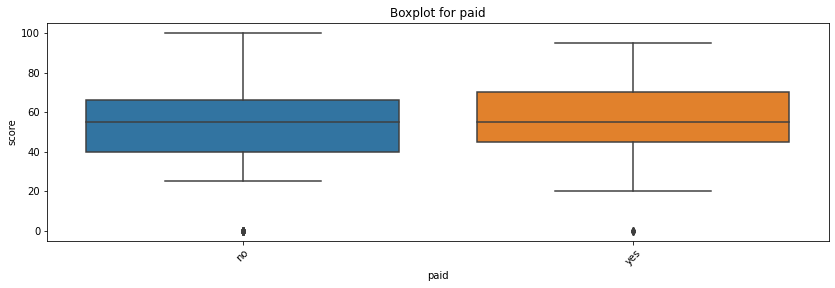

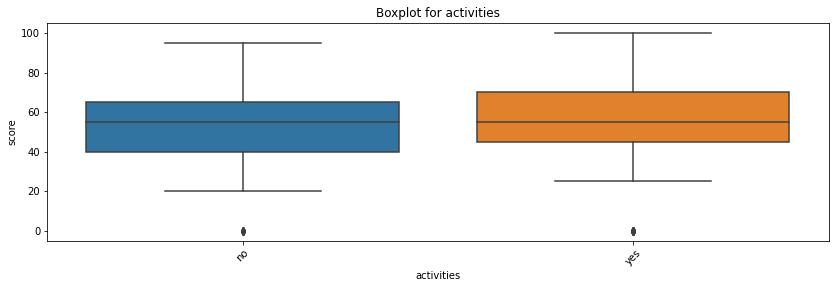

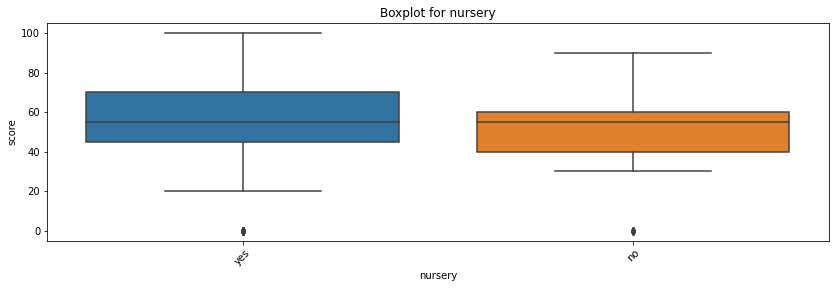

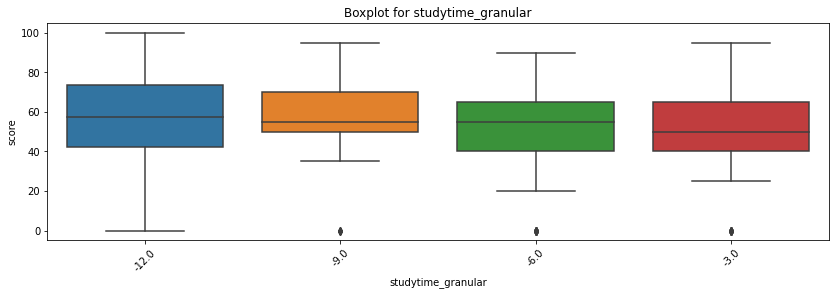

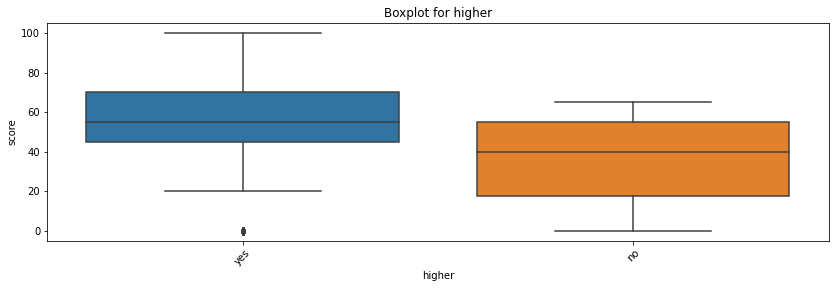

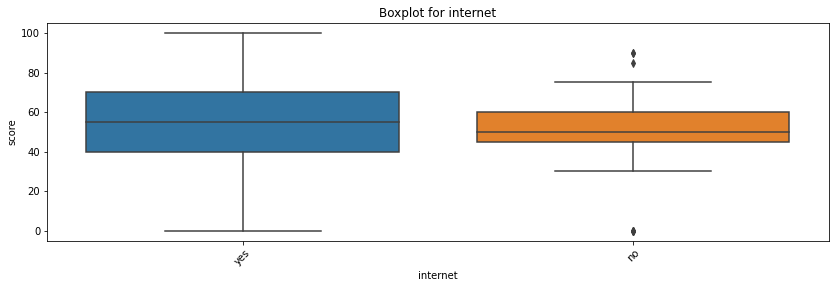

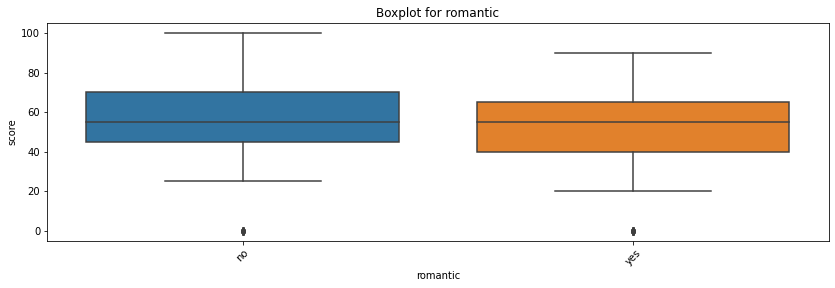

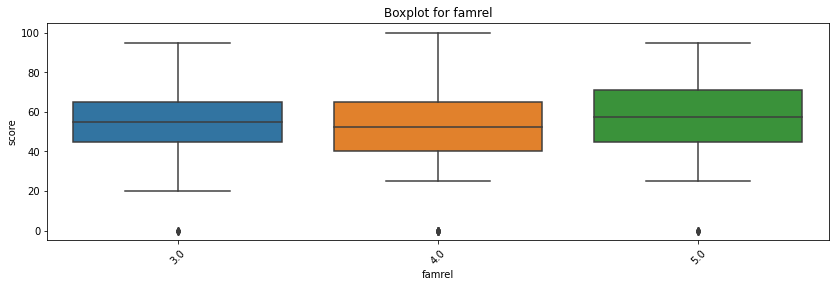

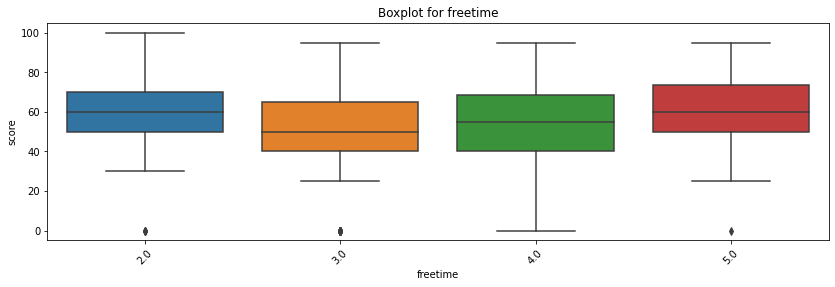

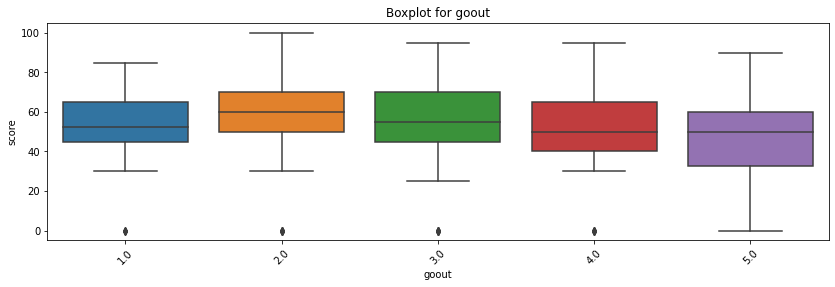

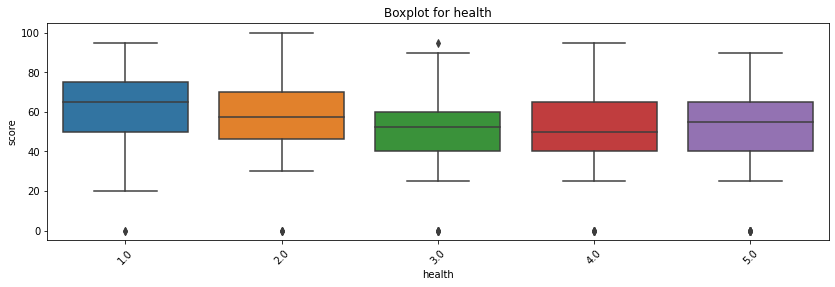

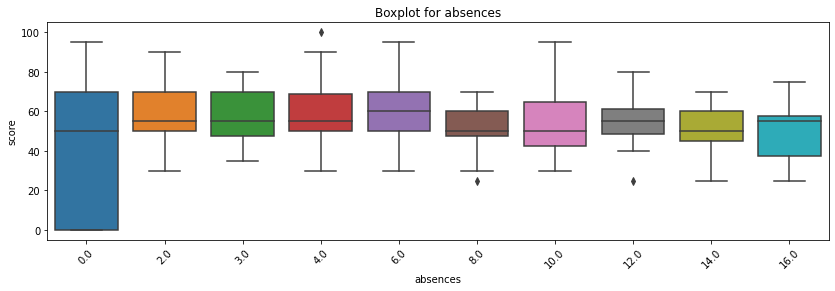

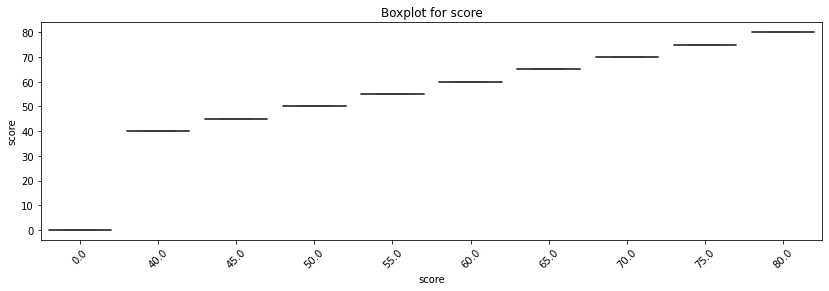

In [72]:
for col in dt.columns:
    get_boxplot(col)

# Визуальный анализ боксплотов по номинативным переменным
##### Колонки, оказывающие влияние на score:
- ##### school
- ##### sex
- ##### age
- ##### address
- ##### medu
- ##### fedu
- ##### mjob
- ##### fjob
- ##### failures
- ##### schoolsup
- ##### paid
- ##### activities
- ##### nursery
- ##### higher
- ##### romantic
- ##### famrel
- ##### freetime
- ##### goout
- ##### health
- ##### absences

##### Колонки, не оказывающие влияние на score:

- ##### famsize
- ##### pstatus
- ##### reason
- ##### guardian
- ##### traveltime
- ##### studytime
- ##### famsup
- ##### studytime_granular
- ##### internet



# Тест Стьюдента
##### Для теста Стьюжента выберем только колонки, в которых может быть более 2 различных значений
##### для каждой выполним тест, проверим нулевую гипотезу о равенстве score у записей с различными значениями 
##### колонки. значимость вынесем в параметр, чтобы было удобнее провести несколько тестов с разным уровнем значимости.
##### Т.к. выполняется множественная проверка гипотез, необходимо вводить поправку Боферрони, а она в свою очередь на уровне
##### значимости 0.05 отфильтровывает почти все колонки, поэтому, в первичном приближении (анализ же разведывательный) ##### остановимся на уровне значимости 0.2

In [80]:
for col in ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
            'traveltime', 'studytime', 'failures', 'studytime_granular',
            'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_stat_diff(col, 0.2)

Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки freetime
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


##### Результаты теста Стьюдента не противоречат результатам визуального анализа боксплотов, 
##### поэтому за итоговый состав колонок возьмем объединение 2 результатов  :

In [82]:
dt_for_model = dt.loc[:, ['school', 'sex', 'age', 'address', 'Medu', 
                          'Medu', 'Mjob', 'Mjob', 'failures', 'schoolsup',
                          'paid', 'activities', 'nursery', 'higher', 'romantic', 
                          'famrel', 'freetime', 'goout', 'health', 'absences']]
dt.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18.0,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
